# <span style="color:darkred">  Esercitazione 10 </span>

### Esercizio 10.1
By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.
____________________________
##### Svolgimento
Per raggiungere la convergenza ad un risultato ottimale la popolazione evolve in maniera tale che durante l'evoluzione possano avvenire i seguenti eventi, tutti con probabilità del 25%:
   * PairPermutation: scambio due elementi tra di loro.
   * BlockPermutation: scambio due blocchi di elementi contigui di grandezza M < Ntot/2.
   * Shift: sposto tutti gli elementi di un certo numero varibile. 
   * Permutazione totale.
   
Per le città ho utilizzato nel primo caso una circonferenza di raggio unitario, mentre nel secondo caso un quadrato di lato 1.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### 32 cities randomly placed on a circumference

In questa simulazione il raffreddamento viene fatto partendo da un Beta = 1. Ogni 10.000 steps viene eseguito un raffreddamento di Beta = Beta + dB, con dB = 10. In questo modo viene raggiunto il minimo globale viene raggiunto subito dopo 15 raffreddamenti, come si può osservare nel seguente grafico.

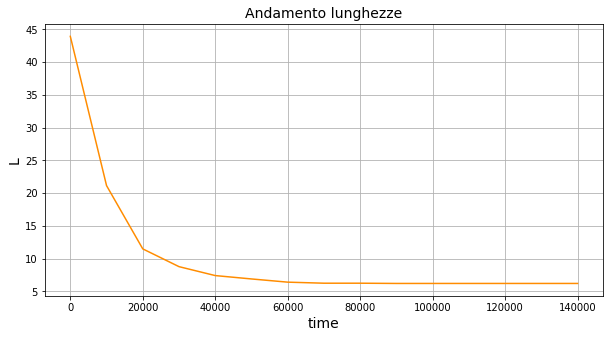

In [2]:
t, l = np.loadtxt("Es01\lunghezze.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.figure(1,figsize=(10,5))
plt.plot(t, l, color='darkorange', label = 'Simulated Annealing')
plt.title('Andamento lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.grid(True)

plt.show()

Tramite il Simulated Annealing, il percorso ottimizzato ha una lunghezza $L = 6.138 $, che corrisponde alla lunghezza trovata con l'Algoritmo Genetico. 

Di seguito viene mostrata una mappa del percorso, confrontata con quella trovata dall'Algoritmo Genetico.

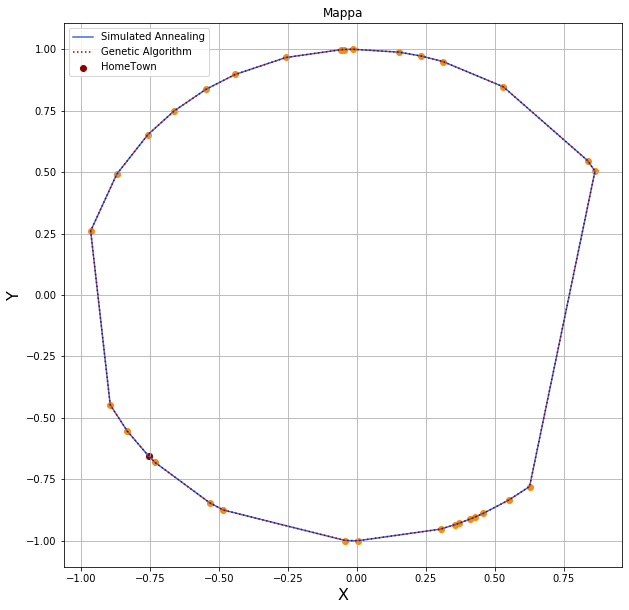

In [3]:
x, y = np.loadtxt("Es01\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')
x2, y2 = np.loadtxt("..\Exercises_09\Es01\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')

plt.figure(1, figsize=(10,10))
plt.scatter(x, y, color='darkorange')
plt.scatter(x[0], y[0], color='darkred', label = "HomeTown")
plt.plot(x, y, color='royalblue', label = 'Simulated Annealing')
plt.plot(x2, y2, linestyle='dotted'  ,color='darkred', label = "Genetic Algorithm")
plt.title('Mappa')
plt.xlabel('X',fontsize= 16)
plt.ylabel('Y', fontsize= 16)
plt.legend()
plt.grid(True)

plt.show()

#### 32 cities randomly placed inside a square

In questa simulazione è stato necessario andare ad esplorare un range maggiore di temperature per poter raggiungere il minimo globale. Il raffreddamento viene eseguito partendo da un Beta = 0.3. Ogni 50.000 steps viene eseguito un raffreddamento riscalando beta di un fattore dB = 1.1. In questo modo viene raggiunto il minimo globale viene raggiunto subito dopo 100 raffreddamenti, come si può osservare nel seguente grafico.

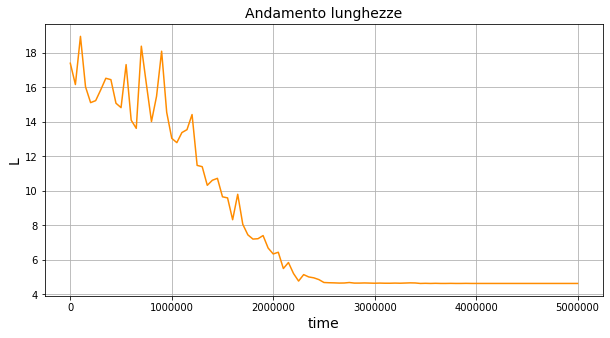

In [4]:
t, l = np.loadtxt("Es02\lunghezze.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.figure(1,figsize=(10,5))
plt.plot(t, l, color='darkorange')
plt.title('Andamento lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.grid(True)

plt.show()

Tramite il Simulated Annealing, il percorso ottimizzato ha una lunghezza $L = 4.63666 $. Il percorso risulta essere più breve rispetto a quello trovato con il Genetic Algorithm, $L = 4.88006$.

Di seguito viene mostrata una mappa del percorso, confrontata con quella trovata dall'Algoritmo Genetico.

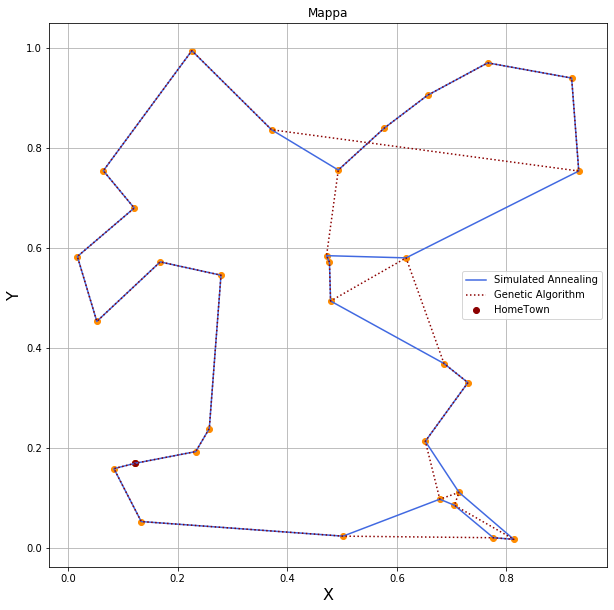

In [5]:
x, y = np.loadtxt("Es02\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')
x2, y2 = np.loadtxt("..\Exercises_09\Es02\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')

plt.figure(1, figsize=(10,10))
plt.scatter(x, y, color='darkorange')
plt.scatter(x[0], y[0], color='darkred', label = "HomeTown")
plt.plot(x, y, color='royalblue', label = 'Simulated Annealing')
plt.plot(x2, y2, linestyle='dotted'  ,color='darkred', label = "Genetic Algorithm")
plt.title('Mappa')
plt.xlabel('X',fontsize= 16)
plt.ylabel('Y', fontsize= 16)
plt.legend()
plt.grid(True)

plt.show()

### Esercizio 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 parallel GA searches of the optimal path:
each node should perform an independent GA search the so-called *Continents*, but every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

_________________________
##### Svolgimento

Ho eseguito l'ottimizzazione andando a eseguire un totale di 50000 steps (in verità dopo l'ultimo scambio eseguo un ultimo giro di ottimizzazione), tempo in cui avevo verificato avvenisse l'ottimizzazione (locale) nell'esercizio precedente. Gli steps sono suddivisi in maniera tale da eseguire 50 migrazioni tra i 4 nodi. Ogni volta la coppia send-recive è estratta in maniera random. 

Di seguito è riportato il grafico dell'andamento delle lunghezze per i 4 nodi.

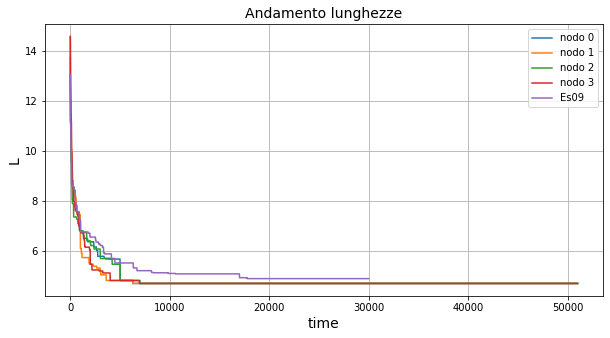

In [18]:
l0 = np.loadtxt("Es03\lunghezze_0.dat", usecols=(0), unpack='true')
l1 = np.loadtxt("Es03\lunghezze_1.dat", usecols=(0), unpack='true')
l2 = np.loadtxt("Es03\lunghezze_2.dat", usecols=(0), unpack='true')
l3 = np.loadtxt("Es03\lunghezze_3.dat", usecols=(0), unpack='true')
t1, l = np.loadtxt("..\Exercises_09\Es02\lunghezze.dat", usecols=(0,1), delimiter='   ', unpack='true')
t = np.arange(len(l0))

plt.figure(1, figsize=(10,5))
plt.plot(t, l0, label = "nodo 0")
plt.plot(t, l1, label = "nodo 1")
plt.plot(t, l2, label = "nodo 2")
plt.plot(t, l3, label = "nodo 3")
plt.plot(t1, l, label = "Es09")
plt.title('Andamento lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.legend(loc = 'best')
plt.grid(True)

plt.show()

Dal grafico si osserva che tutti i 4 nodi convergono alla medesima lunghezza, che risulta essere minore della lunghezza trovata nell'esercitazione precedente. 
Il percorso ottimizzato è lungo $L = 4.68713$, mentre precedentemente trovavo un percorso lungo $L = 4.88006$. Tuttavia il risultato trovato non risulta ancora essere il minimo globale, trovato precedentemente con il simulated annealing.

Di seguito sono riportate le mappe per tutti i 4 nodi (convergono nella medesima), confrontata con la mappa trovata con il metodo del simulated annealing.

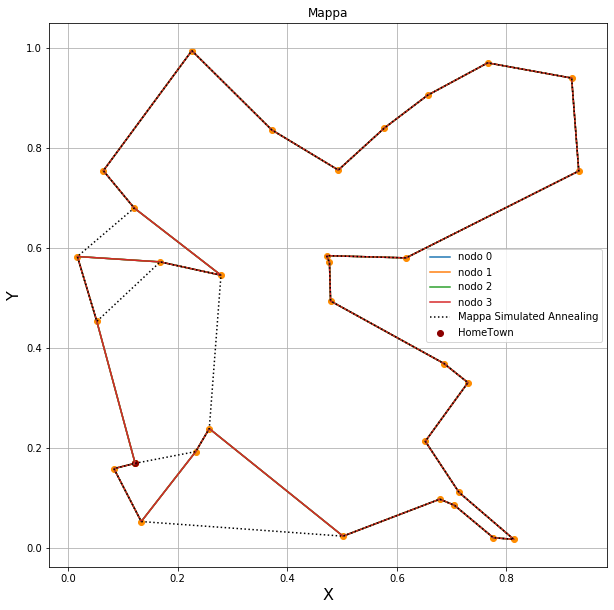

In [17]:
x0, y0 = np.loadtxt("Es03\mappa_0.dat", usecols=(1,2), delimiter='   ', unpack='true')
x1, y1 = np.loadtxt("Es03\mappa_1.dat", usecols=(1,2), delimiter='   ', unpack='true')
x2, y2 = np.loadtxt("Es03\mappa_2.dat", usecols=(1,2), delimiter='   ', unpack='true')
x3, y3 = np.loadtxt("Es03\mappa_3.dat", usecols=(1,2), delimiter='   ', unpack='true')
#x, y = np.loadtxt("..\Exercises_09\Es02\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')
x, y = np.loadtxt("Es02\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')

plt.figure(1, figsize=(10,10))
plt.scatter(x, y, color='darkorange')
plt.scatter(x[0], y[0], color='darkred', label = "HomeTown")
plt.plot(x0, y0, label = 'nodo 0')
plt.plot(x1, y1, label = 'nodo 1')
plt.plot(x2, y2, label = 'nodo 2')
plt.plot(x3, y3, label = 'nodo 3')
plt.plot(x, y, linestyle='dotted', color = "black" , label = 'Mappa Simulated Annealing')
plt.title('Mappa')
plt.xlabel('X',fontsize= 16)
plt.ylabel('Y', fontsize= 16)
plt.legend(fontsize= 10)
plt.grid(True)

plt.show()